In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re

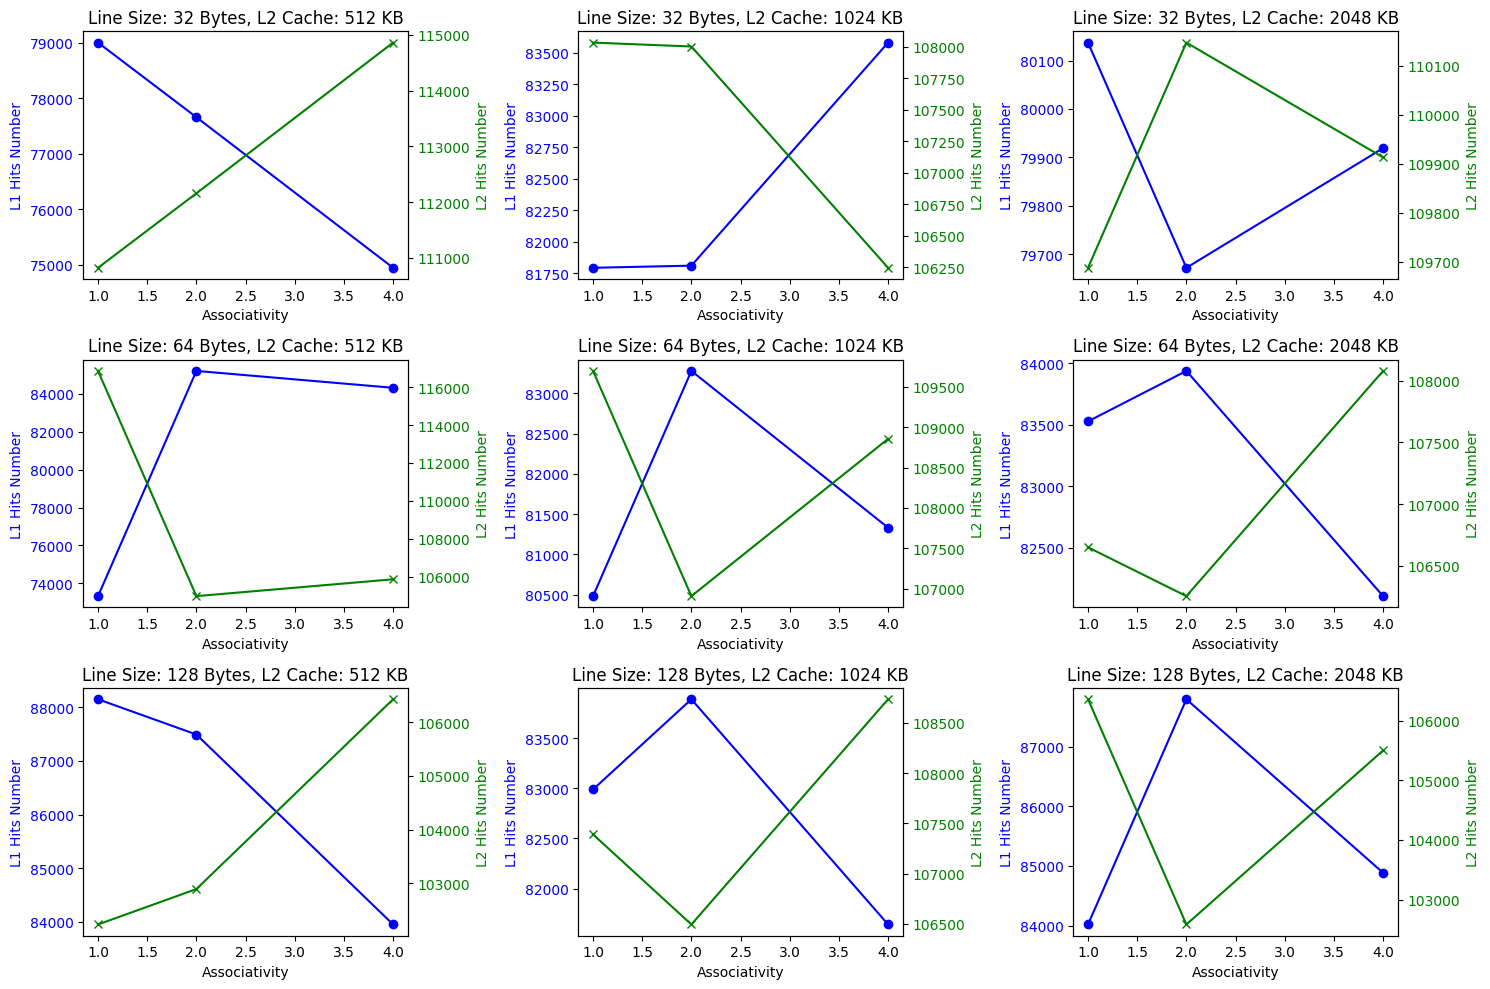

In [7]:
def extract_data_to_df(log_content):
    pattern = (
        r"L1 Cache Size: (\d+) KB, L2 Cache Size: (\d+) KB, Line Size: (\d+) Bytes, Associativity: (\d+)\n"
        r"L1 Hits: (\d+), L1 Misses: (\d+), L2 Hits: (\d+), L2 Misses: (\d+)\n"
        r"L1 Hit Rate: ([\d\.]+), L2 Hit Rate: ([\d\.]+)\n"
        r"total_time: (\d+) cycles"
    )
    extracted_rows = re.findall(pattern, log_content)
    
    columns = ['L1 Cache Size', 'L2 Cache Size', 'Line Size', 'Associativity', 'L1 Hits', 'L1 Misses', 
               'L2 Hits', 'L2 Misses', 'L1 Hit Rate', 'L2 Hit Rate', 'Total Time']
    df = pd.DataFrame(extracted_rows, columns=columns)
    df[columns] = df[columns].apply(pd.to_numeric)

    return df

l2_cache_sizes = [512, 1024, 2048]
line_sizes = [32, 64, 128]
file_path = './d1cache32k.log'

with open(file_path, 'r') as file:
    log_content = file.read()

df = extract_data_to_df(log_content)
fig, axs = plt.subplots(len(line_sizes), len(l2_cache_sizes), figsize=(15, 10))

for i, line_size in enumerate(line_sizes):
    for j, l2_cache_size in enumerate(l2_cache_sizes):
        df_filtered = df[(df['L2 Cache Size'] == l2_cache_size) & (df['Line Size'] == line_size)]

        if not df_filtered.empty:
            # Creating a secondary y-axis for L2 Hits
            ax2 = axs[i, j].twinx()

            # Plotting L1 Hits on the original y-axis
            axs[i, j].plot(df_filtered['Associativity'], df_filtered['L1 Hits'], marker='o', linestyle='-', color='blue', label='L1 Hits')
            axs[i, j].set_ylabel('L1 Hits Number', color='blue')

            # Plotting L2 Hits on the secondary y-axis
            ax2.plot(df_filtered['Associativity'], df_filtered['L2 Hits'], marker='x', linestyle='-', color='green', label='L2 Hits')
            ax2.set_ylabel('L2 Hits Number', color='green')

            axs[i, j].set_title(f'Line Size: {line_size} Bytes, L2 Cache: {l2_cache_size} KB')
            axs[i, j].set_xlabel('Associativity')
            axs[i, j].tick_params(axis='y', labelcolor='blue')
            ax2.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.show()

可以看到, 
line size = 64 bytes, L2 cache size = 256KB,  L2 associativity = 2时, hit rate 最低.



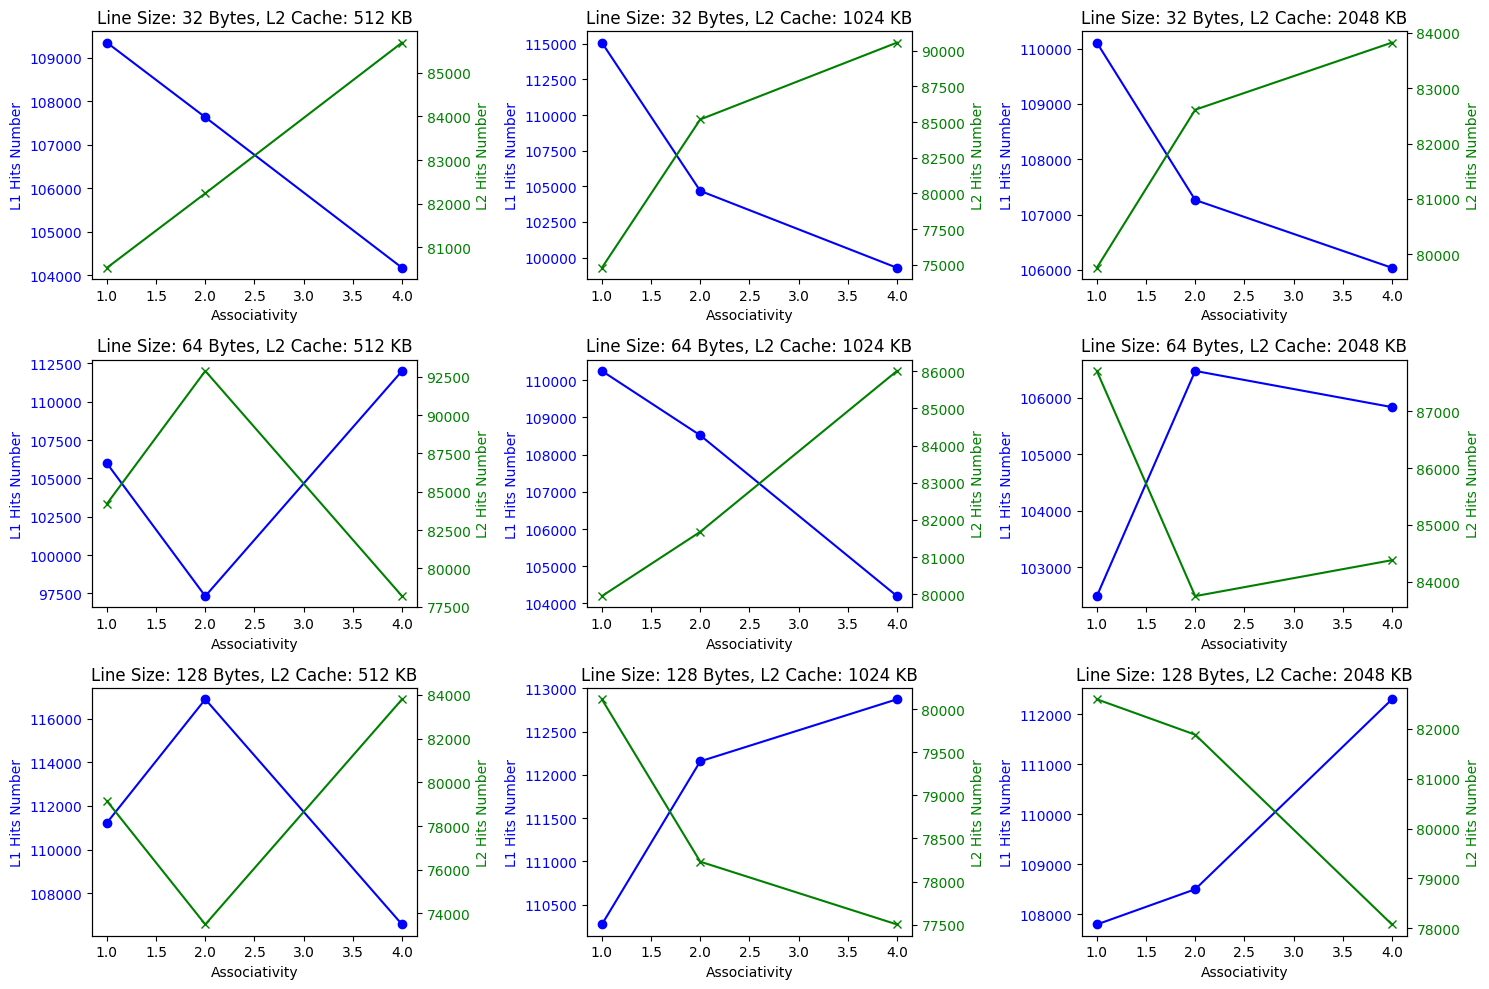

In [8]:
l2_cache_sizes = [512, 1024, 2048]
line_sizes = [32, 64, 128]
file_path = './d1cache64k.log'

with open(file_path, 'r') as file:
    log_content = file.read()

df = extract_data_to_df(log_content)
fig, axs = plt.subplots(len(line_sizes), len(l2_cache_sizes), figsize=(15, 10))

for i, line_size in enumerate(line_sizes):
    for j, l2_cache_size in enumerate(l2_cache_sizes):
        df_filtered = df[(df['L2 Cache Size'] == l2_cache_size) & (df['Line Size'] == line_size)]

        if not df_filtered.empty:
            # Creating a secondary y-axis for L2 Hits
            ax2 = axs[i, j].twinx()

            # Plotting L1 Hits on the original y-axis
            axs[i, j].plot(df_filtered['Associativity'], df_filtered['L1 Hits'], marker='o', linestyle='-', color='blue', label='L1 Hits')
            axs[i, j].set_ylabel('L1 Hits Number', color='blue')

            # Plotting L2 Hits on the secondary y-axis
            ax2.plot(df_filtered['Associativity'], df_filtered['L2 Hits'], marker='x', linestyle='-', color='green', label='L2 Hits')
            ax2.set_ylabel('L2 Hits Number', color='green')

            axs[i, j].set_title(f'Line Size: {line_size} Bytes, L2 Cache: {l2_cache_size} KB')
            axs[i, j].set_xlabel('Associativity')
            axs[i, j].tick_params(axis='y', labelcolor='blue')
            ax2.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.show()

这里的l1 cache size都为64KB, 
line size = 32 bytes,   L2 associativity 越高,  L2 hit rate 越高
 